In [1]:
import pandas as pd
import pandas_profiling
import missingno as msno

In [2]:
%matplotlib inline

In [3]:
events = pd.read_csv('./data/collisions_events.csv', delimiter=';', index_col='collision_id')

/home/derek/anaconda3/envs/gds/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
events.head()

,collision_date,collision_time,px,street_1,street_type_1,direction_1,street_2,street_type_2,direction_2,street_3,...,location_class,location_desc,collision_type,impact_type,road_class,visibility,light,road_surface_cond,longitude,latitude
collision_id,,,,,,,,,,,,,,,,,,,,,
1,2008-01-01,1,NaN,2219 LAWRENCE,AVEN,W,NaN,NaN,NaN,NaN,...,NaN,NaN,PROPERTY DAMAGE ONLY,SMV OTHER,MINOR ARTERIAL,OTHER,DARK,OTHER,-79.524200,43.697900
2,2008-01-01,1,NaN,24 DELORAINE,AVEN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,PROPERTY DAMAGE ONLY,SIDESWIPE,LOCAL,CLEAR,DARK,DRY,-79.406000,43.733700
3,2008-01-01,1,NaN,10 WIDMER,ST,NaN,UNKNOWN,NaN,NaN,NaN,...,NaN,MID-BLOCK,PROPERTY DAMAGE ONLY,SMV UNATTENDED VEHICLE,LANEWAY,RAIN,DARK,WET,-79.391700,43.646700
4,2008-01-01,45,785.0,MARTIN GROVE,ROAD,NaN,BURNHAMTHORPE,ROAD,NaN,NaN,...,NaN,NaN,PROPERTY DAMAGE ONLY,ANGLE,MAJOR ARTERIAL,SNOW,DARK,LOOSE SNOW,-79.549100,43.648600
5,2008-01-01,45,NaN,CARLTON,ST,NaN,CHURCH,ST,NaN,NaN,...,NaN,MID-BLOCK,PROPERTY DAMAGE ONLY,REAR END,MAJOR ARTERIAL,SNOW,DARK,SLUSH,-79.378876,43.661949


In [5]:
events.columns

Index(['collision_date', 'collision_time', 'px', 'street_1', 'street_type_1',
       'direction_1', 'street_2', 'street_type_2', 'direction_2', 'street_3',
       'street_type_3', 'direction_3', 'location_class', 'location_desc',
       'collision_type', 'impact_type', 'road_class', 'visibility', 'light',
       'road_surface_cond', 'longitude', 'latitude'],
      dtype='object')

In [6]:
# Pedestrian and cyclist collisions are a focus of interest 
events.impact_type.value_counts()

REAR END                  157530
TURNING MOVEMENT           94344
SIDESWIPE                  72997
SMV UNATTENDED VEHICLE     46055
ANGLE                      44085
SMV OTHER                  22948
PEDESTRIAN COLLISIONS      17684
CYCLIST COLLISIONS         11862
APPROACHING                10770
OTHER                       8331
Name: impact_type, dtype: int64

In [7]:
involved = pd.read_csv('./data/collisions_involved.csv', delimiter=';', index_col='collision_id')

/home/derek/anaconda3/envs/gds/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/derek/anaconda3/envs/gds/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
involved.head()

,traffic_control,vehicle_class,initial_dir,event1,event2,event3,involved_class,involved_age,involved_injury_class,safety_equip_used,driver_action,pedestrian_action,pedestrian_collision_type,cyclist_action,cyclist_collision_type,manoeuver,actual_speed,posted_speed
collision_id,,,,,,,,,,,,,,,,,,
1,NO CONTROL,OTHER,NaN,BUILDING OR WALL,NaN,NaN,OTHER PROPERTY OWNER,NaN,NONE,OTHER SAFETY EQUIPMENT USED,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN
1,NO CONTROL,"AUTOMOBILE, STATION WAGON",NaN,BUILDING OR WALL,NaN,NaN,DRIVER,31.0,NONE,OTHER SAFETY EQUIPMENT USED,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN
2,NO CONTROL,"AUTOMOBILE, STATION WAGON",NaN,OTHER,NaN,NaN,DRIVER,NaN,NONE,USE UNKNOWN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN
2,NO CONTROL,OTHER,EAST,OTHER,NaN,NaN,OTHER,51.0,NONE,OTHER SAFETY EQUIPMENT USED,NaN,NaN,NaN,NaN,NaN,PARKED,NaN,NaN
3,NO CONTROL,"AUTOMOBILE, STATION WAGON",EAST,OTHER,NaN,NaN,DRIVER,NaN,NONE,OTHER SAFETY EQUIPMENT USED,IMPROPER PASSING,NaN,NaN,NaN,NaN,GOING AHEAD,NaN,NaN


In [9]:
involved.columns

Index(['traffic_control', 'vehicle_class', 'initial_dir', 'event1', 'event2',
       'event3', 'involved_class', 'involved_age', 'involved_injury_class',
       'safety_equip_used', 'driver_action', 'pedestrian_action',
       'pedestrian_collision_type', 'cyclist_action', 'cyclist_collision_type',
       'manoeuver', 'actual_speed', 'posted_speed'],
      dtype='object')

In [10]:
# Should subset to major and fatal collisions
involved.involved_injury_class.value_counts()

NONE       987864
MINIMAL     84799
MINOR       60049
MAJOR        3761
FATAL         543
Name: involved_injury_class, dtype: int64

In [11]:
ksi = involved[(involved.involved_injury_class == 'FATAL') | (involved.involved_injury_class == 'MAJOR')]

In [12]:
ksi.index.unique()

Int64Index([   458,    589,    722,    731,    913,    918,    926,    955,
              1324,   1337,
            ...
            484339, 484347, 484475, 484583, 484683, 484792, 485919, 485956,
            486160, 486448],
           dtype='int64', name='collision_id', length=3993)

In [13]:
ksi = ksi.merge(events, left_index=True, right_index=True)

In [14]:
ped_cyc_ksi = ksi[(ksi.impact_type == 'PEDESTRIAN COLLISIONS') | (ksi.impact_type == 'CYCLIST COLLISIONS')]

In [15]:
ped_cyc_ksi.street_1.value_counts()

EGLINTON              80
DUNDAS                74
FINCH                 71
QUEEN                 66
YONGE                 59
LAWRENCE              56
BATHURST              51
STEELES               51
DANFORTH              47
BLOOR                 46
SHEPPARD              45
ST CLAIR              40
VICTORIA PARK         33
JANE                  33
DUFFERIN              32
SPADINA               29
LAKE SHORE            28
KING                  26
COLLEGE               26
KINGSTON              25
KENNEDY               22
MARKHAM               20
GERRARD               20
KIPLING               20
AVENUE                20
DON MILLS             18
WARDEN                18
BAYVIEW               16
WESTON                16
MIDLAND               16
                      ..
FALMOUTH AVE           1
SILVERTHORN            1
MANNING                1
VICTORIA               1
55 AVENUE              1
STEELES AV E           1
MARGUERETTA            1
GRENVIEW               1
CIVIC                  1


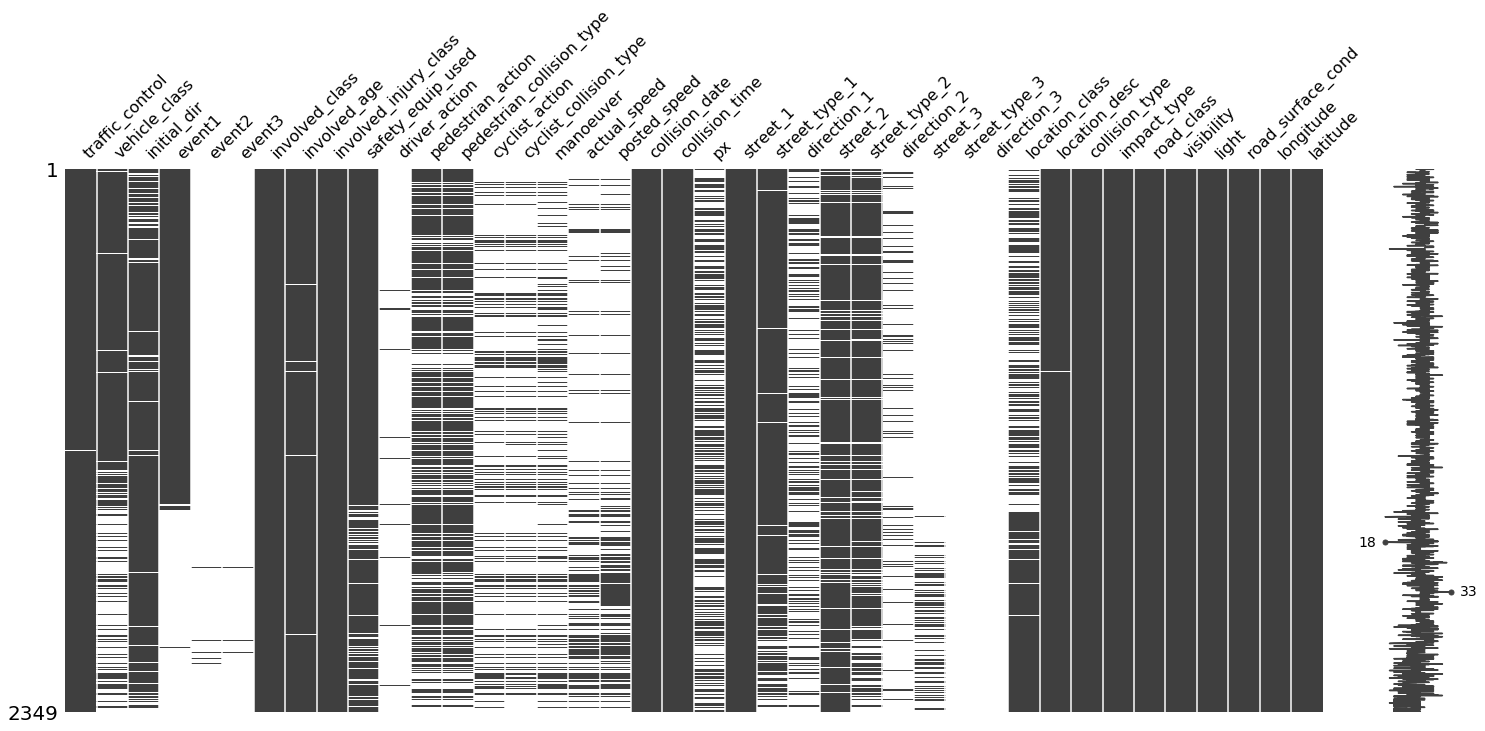

In [16]:
msno.matrix(ped_cyc_ksi)

In [17]:
# collisions where a driver was speeding
ped_cyc_ksi[ped_cyc_ksi.actual_speed > ped_cyc_ksi.posted_speed]

,traffic_control,vehicle_class,initial_dir,event1,event2,event3,involved_class,involved_age,involved_injury_class,safety_equip_used,...,location_class,location_desc,collision_type,impact_type,road_class,visibility,light,road_surface_cond,longitude,latitude
collision_id,,,,,,,,,,,,,,,,,,,,,
20439,NO CONTROL,"AUTOMOBILE, STATION WAGON",NORTH,OTHER,NaN,NaN,DRIVER,52.0,MAJOR,OTHER SAFETY EQUIPMENT USED,...,NaN,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,COLLECTOR,RAIN,DAYLIGHT,WET,-79.234700,43.741500
22366,NO CONTROL,OTHER,EAST,OTHER,NaN,NaN,PEDESTRIAN,26.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,MID-BLOCK,FATAL,PEDESTRIAN COLLISIONS,MINOR ARTERIAL,RAIN,DARK,WET,-79.332600,43.807700
22366,NO CONTROL,OTHER,EAST,OTHER,NaN,NaN,PEDESTRIAN,28.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,MID-BLOCK,FATAL,PEDESTRIAN COLLISIONS,MINOR ARTERIAL,RAIN,DARK,WET,-79.332600,43.807700
23784,TRAFFIC SIGNAL,OTHER,NORTH,OTHER,NaN,NaN,PEDESTRIAN,75.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,AT INTERSECTION,INTERSECTION,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DARK,DRY,-79.518600,43.718700
26110,TRAFFIC SIGNAL,OTHER,NORTH,OTHER,NaN,NaN,PEDESTRIAN,50.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,AT INTERSECTION,INTERSECTION,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DAYLIGHT,DRY,-79.323800,43.683300
33270,NO CONTROL,BICYCLE,WEST,OTHER,NaN,NaN,CYCLIST,50.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,AT INTERSECTION,INTERSECTION,FATAL,CYCLIST COLLISIONS,MINOR ARTERIAL,CLEAR,DAYLIGHT,DRY,-79.499200,43.697300
151882,NO CONTROL,OTHER,WEST,OTHER,NaN,NaN,PEDESTRIAN,79.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,MID-BLOCK,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,CLEAR,DARK,WET,-79.426900,43.706600
203774,NO CONTROL,MOTORCYCLE,SOUTH,OTHER,NaN,NaN,MOTORCYCLE DRIVER,48.0,MAJOR,HELMET,...,NaN,INTERSECTION,NON-FATAL INJURY,PEDESTRIAN COLLISIONS,MINOR ARTERIAL,CLEAR,DAYLIGHT,DRY,-79.367800,43.663200
234260,NO CONTROL,OTHER,UNKNOWN,OTHER,NaN,NaN,PEDESTRIAN,34.0,FATAL,OTHER SAFETY EQUIPMENT USED,...,NaN,MID-BLOCK,FATAL,PEDESTRIAN COLLISIONS,MAJOR ARTERIAL,RAIN,DARK,WET,-79.453500,43.714100


In [18]:
#report = pandas_profiling.ProfileReport(ped_cyc_ksi)

In [19]:
#report.to_file(outputfile='ped_cyc_ksi_report.html')